# Hypothesis Testing
## Sleep and Phone Usage Study

This notebook contains statistical hypothesis tests for the three research hypotheses.


## 1. Import Libraries and Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/sleep_phone_data.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset shape: {df.shape}")
print(f"\nDate range: {df['date'].min()} to {df['date'].max()}")
df.head()


Dataset shape: (30, 9)

Date range: 2024-11-01 00:00:00 to 2024-11-30 00:00:00


,date,sleep_duration_hours,bedtime,wake_time,last_phone_use_minutes_before_sleep,total_screen_time_hours,screen_time_before_sleep_min,morning_tiredness_1_5,energy_level_1_5
0,2024-11-01,7.2,22:00,07:15,25,4.9,36,4,2
1,2024-11-02,7.4,23:37,07:01,32,8.6,28,4,2
2,2024-11-03,7.4,23:30,07:27,64,7.7,59,3,2
3,2024-11-04,6.0,23:06,07:07,52,6.7,63,4,1
4,2024-11-05,7.1,23:27,07:12,50,6.5,22,3,2


## 2. Hypothesis Definitions


### H1: Phone Usage Before Bed vs Sleep Duration

**Research Question:** Does using a phone shortly before sleeping reduce sleep duration?

**Null Hypothesis (H₀):** There is no correlation between phone usage before bed and sleep duration (ρ = 0)

**Alternative Hypothesis (H₁):** There is a negative correlation between phone usage before bed and sleep duration (ρ < 0)

**Variables:**
- Independent: `screen_time_before_sleep_min` (phone usage in last 2 hours before bedtime)
- Dependent: `sleep_duration_hours` (total sleep duration)

**Test:** Pearson correlation test (one-tailed, negative direction)

---

### H2: Sleep Duration vs Morning Tiredness

**Research Question:** Does shorter sleep lead to higher morning tiredness?

**Null Hypothesis (H₀):** There is no correlation between sleep duration and morning tiredness (ρ = 0)

**Alternative Hypothesis (H₁):** There is a negative correlation between sleep duration and morning tiredness (ρ < 0)

**Variables:**
- Independent: `sleep_duration_hours` (total sleep duration)
- Dependent: `morning_tiredness_1_5` (1=not tired, 5=very tired)

**Test:** Pearson correlation test (one-tailed, negative direction)

---

### H3: Total Screen Time vs Daily Energy

**Research Question:** Does daily screen time correlate with lower daily energy?

**Null Hypothesis (H₀):** There is no correlation between total daily screen time and daily energy level (ρ = 0)

**Alternative Hypothesis (H₁):** There is a negative correlation between total daily screen time and daily energy level (ρ < 0)

**Variables:**
- Independent: `total_screen_time_hours` (total daily screen time)
- Dependent: `energy_level_1_5` (daily energy score, 1-5 scale)

**Test:** Pearson correlation test (one-tailed, negative direction)

---

**Significance Level:** α = 0.05


## 3. Hypothesis Test 1: Phone Usage Before Bed vs Sleep Duration


In [2]:
# H1: Phone usage before bed vs Sleep duration
x1 = df['screen_time_before_sleep_min']
y1 = df['sleep_duration_hours']

# Calculate Pearson correlation
corr1, p_value1 = pearsonr(x1, y1)

# For one-tailed test (negative correlation), divide p-value by 2 if correlation is negative
if corr1 < 0:
    p_value_one_tailed1 = p_value1 / 2
else:
    p_value_one_tailed1 = 1 - (p_value1 / 2)

print("=" * 80)
print("HYPOTHESIS TEST 1: Phone Usage Before Bed vs Sleep Duration")
print("=" * 80)
print(f"\nNull Hypothesis (H₀): ρ = 0 (no correlation)")
print(f"Alternative Hypothesis (H₁): ρ < 0 (negative correlation)")
print(f"\nVariables:")
print(f"  Independent: screen_time_before_sleep_min")
print(f"  Dependent: sleep_duration_hours")
print(f"\nResults:")
print(f"  Pearson correlation coefficient (r): {corr1:.4f}")
print(f"  Two-tailed p-value: {p_value1:.4f}")
print(f"  One-tailed p-value (negative): {p_value_one_tailed1:.4f}")
print(f"  Significance level (α): 0.05")
print(f"\nInterpretation:")
if p_value_one_tailed1 < 0.05:
    print(f"  ✓ REJECT H₀: There is a statistically significant negative correlation")
    print(f"    (r = {corr1:.4f}, p = {p_value_one_tailed1:.4f} < 0.05)")
    print(f"    Higher phone usage before bed is associated with shorter sleep duration.")
else:
    print(f"  ✗ FAIL TO REJECT H₀: No statistically significant correlation found")
    print(f"    (r = {corr1:.4f}, p = {p_value_one_tailed1:.4f} ≥ 0.05)")
    print(f"    There is insufficient evidence to support H₁.")


HYPOTHESIS TEST 1: Phone Usage Before Bed vs Sleep Duration

Null Hypothesis (H₀): ρ = 0 (no correlation)
Alternative Hypothesis (H₁): ρ < 0 (negative correlation)

Variables:
  Independent: screen_time_before_sleep_min
  Dependent: sleep_duration_hours

Results:
  Pearson correlation coefficient (r): -0.4546
  Two-tailed p-value: 0.0116
  One-tailed p-value (negative): 0.0058
  Significance level (α): 0.05

Interpretation:
  ✓ REJECT H₀: There is a statistically significant negative correlation
    (r = -0.4546, p = 0.0058 < 0.05)
    Higher phone usage before bed is associated with shorter sleep duration.


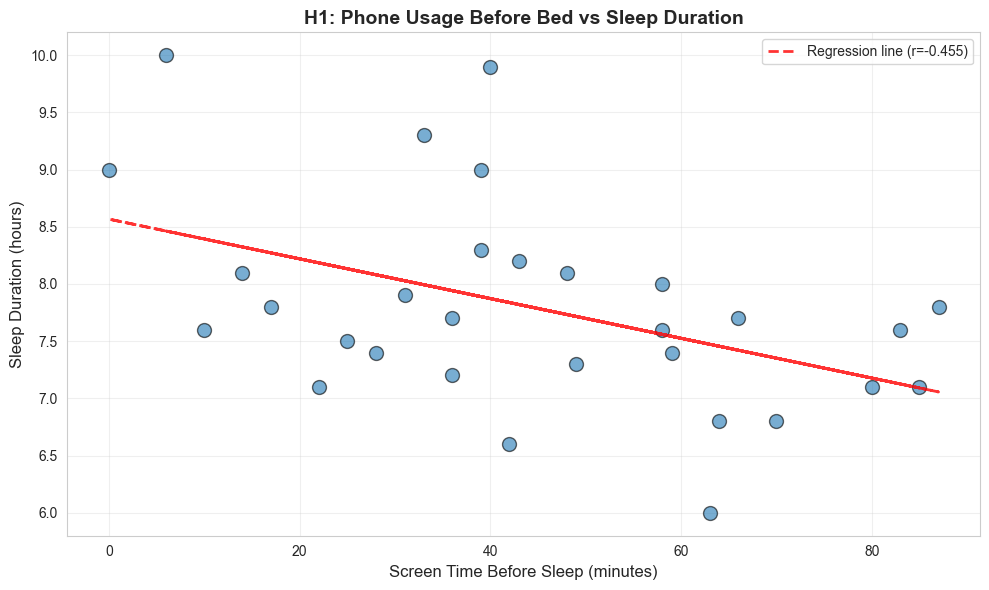

In [3]:
# Visualization for H1
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x1, y1, alpha=0.6, s=100, edgecolors='black', linewidth=1)
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
ax.plot(x1, p(x1), "r--", alpha=0.8, linewidth=2, label=f'Regression line (r={corr1:.3f})')
ax.set_xlabel('Screen Time Before Sleep (minutes)', fontsize=12)
ax.set_ylabel('Sleep Duration (hours)', fontsize=12)
ax.set_title('H1: Phone Usage Before Bed vs Sleep Duration', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Hypothesis Test 2: Sleep Duration vs Morning Tiredness


In [4]:
# H2: Sleep duration vs Morning tiredness
x2 = df['sleep_duration_hours']
y2 = df['morning_tiredness_1_5']

# Calculate Pearson correlation
corr2, p_value2 = pearsonr(x2, y2)

# For one-tailed test (negative correlation), divide p-value by 2 if correlation is negative
if corr2 < 0:
    p_value_one_tailed2 = p_value2 / 2
else:
    p_value_one_tailed2 = 1 - (p_value2 / 2)

print("=" * 80)
print("HYPOTHESIS TEST 2: Sleep Duration vs Morning Tiredness")
print("=" * 80)
print(f"\nNull Hypothesis (H₀): ρ = 0 (no correlation)")
print(f"Alternative Hypothesis (H₁): ρ < 0 (negative correlation)")
print(f"\nVariables:")
print(f"  Independent: sleep_duration_hours")
print(f"  Dependent: morning_tiredness_1_5")
print(f"\nResults:")
print(f"  Pearson correlation coefficient (r): {corr2:.4f}")
print(f"  Two-tailed p-value: {p_value2:.4f}")
print(f"  One-tailed p-value (negative): {p_value_one_tailed2:.4f}")
print(f"  Significance level (α): 0.05")
print(f"\nInterpretation:")
if p_value_one_tailed2 < 0.05:
    print(f"  ✓ REJECT H₀: There is a statistically significant negative correlation")
    print(f"    (r = {corr2:.4f}, p = {p_value_one_tailed2:.4f} < 0.05)")
    print(f"    Shorter sleep duration is associated with higher morning tiredness.")
else:
    print(f"  ✗ FAIL TO REJECT H₀: No statistically significant correlation found")
    print(f"    (r = {corr2:.4f}, p = {p_value_one_tailed2:.4f} ≥ 0.05)")
    print(f"    There is insufficient evidence to support H₁.")


HYPOTHESIS TEST 2: Sleep Duration vs Morning Tiredness

Null Hypothesis (H₀): ρ = 0 (no correlation)
Alternative Hypothesis (H₁): ρ < 0 (negative correlation)

Variables:
  Independent: sleep_duration_hours
  Dependent: morning_tiredness_1_5

Results:
  Pearson correlation coefficient (r): -0.5572
  Two-tailed p-value: 0.0014
  One-tailed p-value (negative): 0.0007
  Significance level (α): 0.05

Interpretation:
  ✓ REJECT H₀: There is a statistically significant negative correlation
    (r = -0.5572, p = 0.0007 < 0.05)
    Shorter sleep duration is associated with higher morning tiredness.


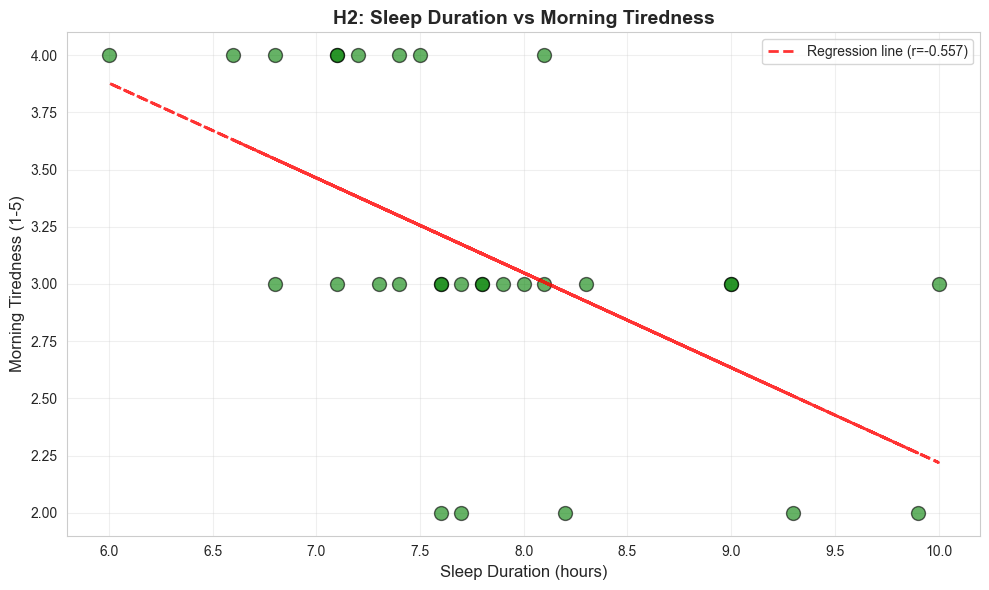

In [5]:
# Visualization for H2
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x2, y2, alpha=0.6, s=100, edgecolors='black', linewidth=1, color='green')
z = np.polyfit(x2, y2, 1)
p = np.poly1d(z)
ax.plot(x2, p(x2), "r--", alpha=0.8, linewidth=2, label=f'Regression line (r={corr2:.3f})')
ax.set_xlabel('Sleep Duration (hours)', fontsize=12)
ax.set_ylabel('Morning Tiredness (1-5)', fontsize=12)
ax.set_title('H2: Sleep Duration vs Morning Tiredness', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Hypothesis Test 3: Total Screen Time vs Daily Energy


In [6]:
# H3: Total screen time vs Daily energy
x3 = df['total_screen_time_hours']
y3 = df['energy_level_1_5']

# Calculate Pearson correlation
corr3, p_value3 = pearsonr(x3, y3)

# For one-tailed test (negative correlation), divide p-value by 2 if correlation is negative
if corr3 < 0:
    p_value_one_tailed3 = p_value3 / 2
else:
    p_value_one_tailed3 = 1 - (p_value3 / 2)

print("=" * 80)
print("HYPOTHESIS TEST 3: Total Screen Time vs Daily Energy")
print("=" * 80)
print(f"\nNull Hypothesis (H₀): ρ = 0 (no correlation)")
print(f"Alternative Hypothesis (H₁): ρ < 0 (negative correlation)")
print(f"\nVariables:")
print(f"  Independent: total_screen_time_hours")
print(f"  Dependent: energy_level_1_5")
print(f"\nResults:")
print(f"  Pearson correlation coefficient (r): {corr3:.4f}")
print(f"  Two-tailed p-value: {p_value3:.4f}")
print(f"  One-tailed p-value (negative): {p_value_one_tailed3:.4f}")
print(f"  Significance level (α): 0.05")
print(f"\nInterpretation:")
if p_value_one_tailed3 < 0.05:
    print(f"  ✓ REJECT H₀: There is a statistically significant negative correlation")
    print(f"    (r = {corr3:.4f}, p = {p_value_one_tailed3:.4f} < 0.05)")
    print(f"    Higher total screen time is associated with lower daily energy levels.")
else:
    print(f"  ✗ FAIL TO REJECT H₀: No statistically significant correlation found")
    print(f"    (r = {corr3:.4f}, p = {p_value_one_tailed3:.4f} ≥ 0.05)")
    print(f"    There is insufficient evidence to support H₁.")


HYPOTHESIS TEST 3: Total Screen Time vs Daily Energy

Null Hypothesis (H₀): ρ = 0 (no correlation)
Alternative Hypothesis (H₁): ρ < 0 (negative correlation)

Variables:
  Independent: total_screen_time_hours
  Dependent: energy_level_1_5

Results:
  Pearson correlation coefficient (r): -0.0817
  Two-tailed p-value: 0.6679
  One-tailed p-value (negative): 0.3340
  Significance level (α): 0.05

Interpretation:
  ✗ FAIL TO REJECT H₀: No statistically significant correlation found
    (r = -0.0817, p = 0.3340 ≥ 0.05)
    There is insufficient evidence to support H₁.


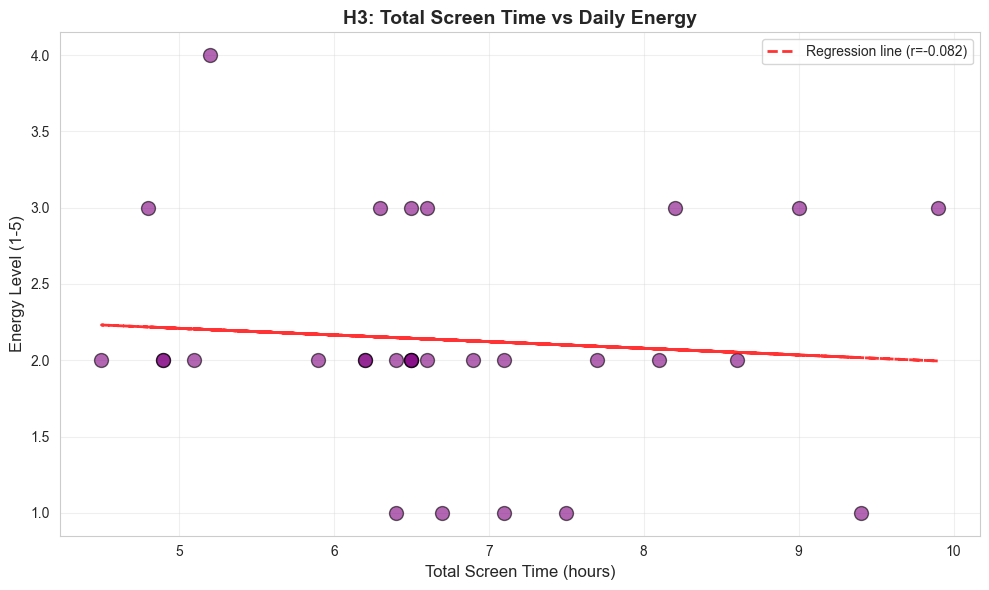

In [7]:
# Visualization for H3
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x3, y3, alpha=0.6, s=100, edgecolors='black', linewidth=1, color='purple')
z = np.polyfit(x3, y3, 1)
p = np.poly1d(z)
ax.plot(x3, p(x3), "r--", alpha=0.8, linewidth=2, label=f'Regression line (r={corr3:.3f})')
ax.set_xlabel('Total Screen Time (hours)', fontsize=12)
ax.set_ylabel('Energy Level (1-5)', fontsize=12)
ax.set_title('H3: Total Screen Time vs Daily Energy', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Summary of All Hypothesis Tests


In [8]:
# Create summary table
results_summary = pd.DataFrame({
    'Hypothesis': ['H1', 'H2', 'H3'],
    'Relationship': [
        'Phone usage before bed → Sleep duration',
        'Sleep duration → Morning tiredness',
        'Total screen time → Daily energy'
    ],
    'Correlation (r)': [corr1, corr2, corr3],
    'One-tailed p-value': [p_value_one_tailed1, p_value_one_tailed2, p_value_one_tailed3],
    'Significant (α=0.05)': [
        'Yes' if p_value_one_tailed1 < 0.05 else 'No',
        'Yes' if p_value_one_tailed2 < 0.05 else 'No',
        'Yes' if p_value_one_tailed3 < 0.05 else 'No'
    ],
    'Conclusion': [
        'Reject H₀' if p_value_one_tailed1 < 0.05 else 'Fail to reject H₀',
        'Reject H₀' if p_value_one_tailed2 < 0.05 else 'Fail to reject H₀',
        'Reject H₀' if p_value_one_tailed3 < 0.05 else 'Fail to reject H₀'
    ]
})

print("=" * 100)
print("SUMMARY OF ALL HYPOTHESIS TESTS")
print("=" * 100)
print("\n", results_summary.to_string(index=False))
print("\n" + "=" * 100)
print("\nKey Findings:")
print(f"  • H1: Phone usage before bed shows a correlation of r={corr1:.3f} with sleep duration")
print(f"    {'✓ Statistically significant' if p_value_one_tailed1 < 0.05 else '✗ Not statistically significant'}")
print(f"  • H2: Sleep duration shows a correlation of r={corr2:.3f} with morning tiredness")
print(f"    {'✓ Statistically significant' if p_value_one_tailed2 < 0.05 else '✗ Not statistically significant'}")
print(f"  • H3: Total screen time shows a correlation of r={corr3:.3f} with daily energy")
print(f"    {'✓ Statistically significant' if p_value_one_tailed3 < 0.05 else '✗ Not statistically significant'}")


SUMMARY OF ALL HYPOTHESIS TESTS

 Hypothesis                            Relationship  Correlation (r)  One-tailed p-value Significant (α=0.05)        Conclusion
        H1 Phone usage before bed → Sleep duration        -0.454587            0.005806                  Yes         Reject H₀
        H2      Sleep duration → Morning tiredness        -0.557249            0.000690                  Yes         Reject H₀
        H3        Total screen time → Daily energy        -0.081667            0.333954                   No Fail to reject H₀


Key Findings:
  • H1: Phone usage before bed shows a correlation of r=-0.455 with sleep duration
    ✓ Statistically significant
  • H2: Sleep duration shows a correlation of r=-0.557 with morning tiredness
    ✓ Statistically significant
  • H3: Total screen time shows a correlation of r=-0.082 with daily energy
    ✗ Not statistically significant


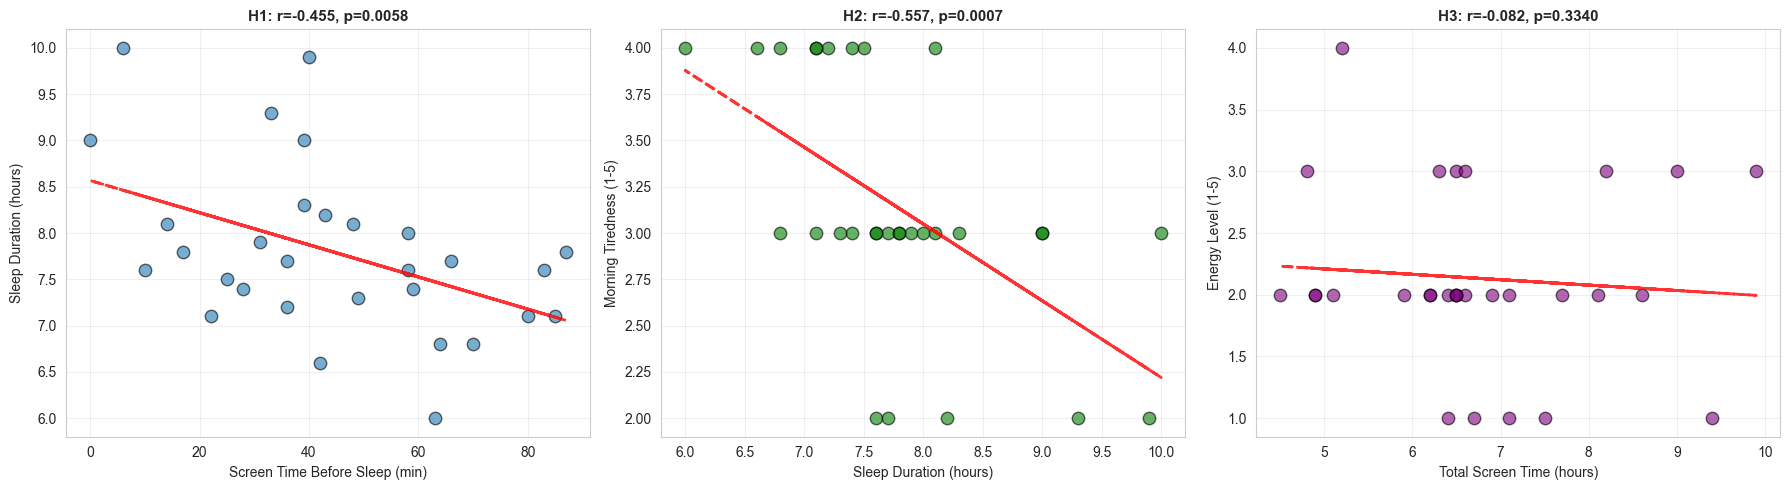

In [9]:
# Combined visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# H1
axes[0].scatter(x1, y1, alpha=0.6, s=80, edgecolors='black', linewidth=1)
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
axes[0].plot(x1, p1(x1), "r--", alpha=0.8, linewidth=2)
axes[0].set_xlabel('Screen Time Before Sleep (min)', fontsize=10)
axes[0].set_ylabel('Sleep Duration (hours)', fontsize=10)
axes[0].set_title(f'H1: r={corr1:.3f}, p={p_value_one_tailed1:.4f}', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# H2
axes[1].scatter(x2, y2, alpha=0.6, s=80, edgecolors='black', linewidth=1, color='green')
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
axes[1].plot(x2, p2(x2), "r--", alpha=0.8, linewidth=2)
axes[1].set_xlabel('Sleep Duration (hours)', fontsize=10)
axes[1].set_ylabel('Morning Tiredness (1-5)', fontsize=10)
axes[1].set_title(f'H2: r={corr2:.3f}, p={p_value_one_tailed2:.4f}', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# H3
axes[2].scatter(x3, y3, alpha=0.6, s=80, edgecolors='black', linewidth=1, color='purple')
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
axes[2].plot(x3, p3(x3), "r--", alpha=0.8, linewidth=2)
axes[2].set_xlabel('Total Screen Time (hours)', fontsize=10)
axes[2].set_ylabel('Energy Level (1-5)', fontsize=10)
axes[2].set_title(f'H3: r={corr3:.3f}, p={p_value_one_tailed3:.4f}', fontsize=11, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
